<a href="https://colab.research.google.com/github/kp-algo/Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/housing[1].csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h1>DATA CLEANING

In [ ]:
df = df.fillna(0)

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
def distance(s):
  if s in ['NEAR BAY','INLAND','ISLAND','NEAR OCEAN']:
    return 1
  else:
    return 0

In [ ]:
df['ocean_proximity'] = df['ocean_proximity'].apply(distance)

In [ ]:
df['ocean_proximity'].unique()

array([1, 0])

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [ ]:
array([-0.42656231, -0.32656231, -0.22656231, -0.22656231, -0.12656231,
       -0.02656231,  0.07343769])

<H1> DATA NORMALISATION

In [ ]:
df['housing_median_age'] = df['housing_median_age']/df['housing_median_age'].max()
df['total_rooms'] = df['total_rooms']/df['total_rooms'].max()
df['total_bedrooms'] = df['total_bedrooms']/df['total_bedrooms'].max()
df['population'] = df['population']/df['population'].max()
df['households'] = df['households']/df['households'].max()
df['median_income'] = df['median_income']/df['median_income'].max()

In [ ]:
df['median_house_value']= df['median_house_value']/df['median_house_value'].max()


---



In [ ]:
X = np.array([df['housing_median_age'], df['total_rooms'], df['total_bedrooms'], df['population'], df['households'], df['median_income'], df['ocean_proximity']])

In [ ]:
X = X.T

In [ ]:
Y = np.array(df['median_house_value']).T

In [ ]:
W = np.array([0.1,0.2,0.3,0.3,0.4,0.5,0.6])

In [ ]:
def model(X,w,b):
  y_pred = X.dot(w) + b
  return y_pred

In [ ]:
y = model(X,W,1)

In [ ]:
X.shape

(20640, 7)

In [ ]:
def cost_function(X,Y,w,b,lambd):
  m = X.shape[0]
  f = (X.dot(w) + b - Y)**2/(2*m)
  cost = np.sum(f)
  reg_cost = np.sum((lambd*(w**2))/(2*m))
  J = cost + reg_cost
  return J

In [ ]:
J = cost_function(X,Y,W,1,0.1)

In [ ]:
def gradient_descent(X,Y,w,b,alpha,lambd,epochs):
  m = X.shape[0]
  J_list = []
  for epoch in range(epochs):
    dw = np.sum(((X.dot(w) + b - Y).T.dot(X)).T)/m + lambd * np.sum(w)/m
    db = np.sum(X.dot(w) + b - Y)/m
    w_temp = w - alpha * dw
    b_temp = b - alpha * db
    J_list.append(cost_function(X,Y,w_temp,b_temp,lambd))
    w = w_temp
    b = b_temp
  return J_list,w,b

In [ ]:
J_list,w,b = gradient_descent(X,Y,W,1,0.001,0.1,1000)

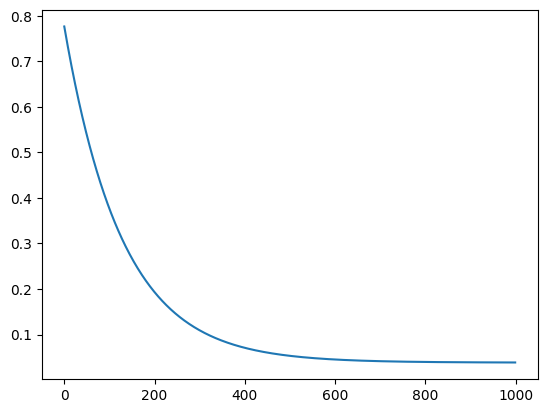

In [ ]:
plt.plot(J_list)

In [ ]:
model(np.array([0.78846144, 0.03238047, 0.02008552, 0.00802416, 0.01071687,
       0.45500963, 1.]),w,b)

0.3826949804744985

In [ ]:
df['median_house_value']

,median_house_value
0,0.905198
1,0.716999
2,0.704199
3,0.682599
4,0.684399
...,...
20635,0.156200
20636,0.154200
20637,0.184600
20638,0.169400


In [ ]:
w

array([-0.42656231, -0.32656231, -0.22656231, -0.22656231, -0.12656231,
       -0.02656231,  0.07343769])